## Build and Visualize Decision Tree from Scratch - Part 21

In this video, we will write machine learning equations to build and visualize decision tree from scratch. We will also use `Graphviz` library to visualize decision tree. In the last video (Part 20), we discussed about finding Best feature and Split value in Decision tree, if you are not familier with these topics, I would recommend you to watch __[Find_BestFeature_SplitValue_Decision Tree.ipynb](https://github.com/akchaudhary57/Andrew-Ng-Coursera-Machine-learning-in-Python/blob/main/Decision%20Tree/Decision%20Tree-BestFeature.ipynb)__

## Part 19

In [1]:
import pandas as pd # Data manipulation
import numpy as np # Scientific computing
from sklearn.datasets import load_iris #Inbuild data set found in Sklearn learn 
import seaborn as sns # For data visualization
import matplotlib.pyplot as plt # For data visualization
from DecisionTree import * # Used in creating several functions

#### Iris Data set
We will be using default iris data set for building decision trees. This data sets consists of 3 different `types` of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length

In [2]:
iris = load_iris() # loading default data set

In [3]:
X = iris.data # Setting values to X
y= iris.target # Setting values to y

In [4]:
y[:5]

array([0, 0, 0, 0, 0])

#### Convert numerical target variable to catagorical variable 

In [5]:
y_numeric = lambda y: 'Iris-setosa' if y==0 else ('Iris-versicolor' if y==1  else 'Iris-Virginica') # Converting numeric to catagorical
vfunc = np.vectorize(y_numeric)  # We need to vectorize
y = vfunc(y)

In [6]:
y[:5] # Checking top 4 rows

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype='<U15')

#### Loading data into dataframe

In [7]:
df = pd.DataFrame(X,columns = ['sepal_length','sepal_width','petal_length','petal_width']) # Loading data in data frame

In [8]:
df['Label'] = y # Adding new columns to the dataframe

In [9]:
df['Label'] = df['Label'].astype('category')

In [10]:
data = df.values # Converting dataframe to numpy array

In [11]:
data[:5] # Checking top 4 rows

array([[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa']], dtype=object)

In [12]:
df['Label'].unique()

[Iris-setosa, Iris-versicolor, Iris-Virginica]
Categories (3, object): [Iris-setosa, Iris-versicolor, Iris-Virginica]

#### Visualizing data using Seaborn

In this visualization, we will take x-coordinate as `petal width` and y-coordinate as `petal length`

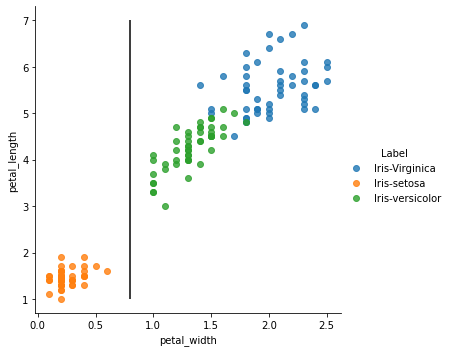

In [13]:
sns.lmplot(data= df, x = "petal_width",y="petal_length",hue= 'Label',fit_reg = False) # using linear model plot 
plt.vlines(x=0.8,ymin = 1,ymax = 7)
plt.show()

### Split data
As in the decision tree, we split our data based on `Yes` and `No` questions. We need to create a split_data function that does the split operation. In the function below, `data_below` shows split to 'left' and `data_above` shows split to right.

In [14]:
def split_data(data,split_column,split_value):
    """ Split data based on column name and split value"""
    split_columns = data[:,split_column]
    data_below = data[split_columns<=split_value] # this gives data less than the split value
    data_above = data[split_columns>split_value] # this gives data less than the split value
    
    return data_below,data_above

Checking the functionality of `Split_data` function

In [15]:
data_below,data_above = split_data(data,3,0.8) # Randomly choosing split columns and split values

In [16]:
data_below[:5] # Checking top 5 values

array([[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa']], dtype=object)

`Entropy` is used to measure the randomness or impurities in the model.`Entropy` controls how a Decision Tree decides to split the data. It actually effects how a Decision Tree draws its boundaries. The `calculate_entropy` function performs the calculation of entropy. The logic would be: -
1. Calculate unique value of dependent variable. In irris data set, the dependent variable is 'Label' column in df dataframe.
2. Calculate probability of dependent variable
3. Use above formula to perform calculations

![Entropy](Decision/understanding_decision_trees_with_python_gini_impurity_2_1.png)

In [17]:
def calculate_entropy(data):
    """Calculate entropy based on dependent variable (label)"""
    label_columns = data[:,-1] # -1 gives last variable
    counts = np.unique(label_columns,return_counts = True)[1] # To generate unique value and [1] means to take 2nd item of list.
    probability = counts/counts.sum() # To Compute probability
    entropy = sum(probability* -np.log2(probability)) # To Compute entropy
    return entropy,probability # To return entropy and probability

In [18]:
# Checking the entropy of data below
entropy,probability = calculate_entropy(data_below)

In [19]:
entropy,probability 

(0.0, array([1.]))

__Interpretation:-__ As we se entropy as 0 and probability of 1 for `data_below`. This tells us that we do not have impurities or randomness in the data.

In [20]:
# Checking the entropy of data above
entropy,probability =  calculate_entropy(data_above)

In [21]:
entropy,probability

(1.0, array([0.5, 0.5]))

__Interpretation:-__ As we se entropy as 1 and probability of 0.5 for `data_above`. This tells us that we have maximum impurities or randomness in the data for `data_above`.

__Gini__ also measures the impurity of a node. `Gini index` and `entropy` are the criteria for calculating information gain. Decision tree algorithms use information gain to split a node. A node having multiple classes is impure whereas a node having only one class is pure.

![GINI INDEX](Decision/GINI_INDEX.png)

In [22]:
def calculate_giniindex(data):
    """Calculate Gini Index based on Dependent variable (Label)"""
    label_columns = data[:,-1] # -1 gives last variable
    counts = np.unique(label_columns,return_counts = True)[1] # To generate unique value and [1] means to take 2nd item of list
    probability = counts/counts.sum() # To Compute probability
    GINIIndex = (1 - np.sum(probability**2,axis = 0)) # To Compute GINI
    return GINIIndex,probability # To return GINI and probability

In [23]:
GINIIndex,probability = calculate_giniindex(data_below)

In [24]:
GINIIndex,probability

(0.0, array([1.]))

__Interpretation:-__ As we see GINI Index as 0 and probability as 1 for `data_below`. This tells us that we do not have impurities or randomness in the data.

In [25]:
GINIIndex,probability = calculate_giniindex(data_above)

In [26]:
GINIIndex,probability

(0.5, array([0.5, 0.5]))

__Interpretation:-__ As we see GINI Index as 0.5 and probability as 1 for `data_above`. This tells us that we do not have impurities or randomness in the data.

## Difference between GINI Index and Entropy

1. `Gini Index`, At probability 0.5, the `GINI index` is 0.5, whereas, at probability 1, the `Entropy` is 1.
2. As `Entropy` involves log transformation, it is computationally expensive compared to `Entropy`.

### Information Gain

`Information Gain` assist us to decide which feature to use to split the data. `Information Gain` is calculated for a split by subtracting the weighted entropies of each branch from the original entropy. When training a Decision Tree using these metrics, the best split is chosen by maximizing Information Gain

![Information Gain](Decision/Information_Gain.png)

We have taken an example of COVID 19 data to calculate entropy, gini index and Information gain

In [27]:
# Writing equations to calulate entropy using Lambda
Proir_Entropy = lambda x,y:-x/(x+y)*np.log2(x/(x+y))-y/(x+y)*np.log2(y/(x+y)) 

In [28]:
Proir_Entropy(2,3)

0.9709505944546686

In [29]:
# Writing equations to calulate Gini index using Lambda
Prior_GINIindex = lambda x,y:1- ((x/(x+y))**2+(y/(x+y))**2) # Writing equations to calulate entropy

In [30]:
Prior_GINIindex(2,3)

0.48

Calculating Entropy for Cough

In [31]:
Result = 2/5*Proir_Entropy(1,1)+3/5*Proir_Entropy(2,1) # Cough

In [32]:
Information_Gain = Proir_Entropy(2,3)-Result # Cough

In [33]:
Information_Gain # Cough

0.01997309402197489

Calculating Gini Index for Cough

In [34]:
Result = 2/5*Prior_GINIindex(1,1)+3/5*Prior_GINIindex(2,1) # Cough

In [35]:
Information_Gain = Prior_GINIindex(2,3)-Result # Cough

In [36]:
Information_Gain

0.013333333333333308

Calculating Entropy for Fever

In [37]:
import warnings
warnings.filterwarnings("ignore") # library to ignore warnings

Result = 2/5*Proir_Entropy(2,0)+3/5*Proir_Entropy(1,2) # Fever

In [38]:
Result = 3/5*Proir_Entropy(1,2)

In [39]:
Information_Gain = Proir_Entropy(2,3)-Result # Fever

In [40]:
Information_Gain

0.4199730940219749

Calculating GINI Index for Fever

In [41]:
Result = 2/5*Prior_GINIindex(2,0)+3/5*Prior_GINIindex(1,2) # Cough

In [42]:
Information_Gain = Prior_GINIindex(2,3)-Result # Cough

In [43]:
Information_Gain

0.21333333333333332

__Interpretation:-__ Highest information gain will be our first feature to split data in decision tree, which as per the example is Fever.

## Part 20

### Steps to build a Decision Tree

1. `Check Purity`: - We will return boolean value as `True` or `False` based on dependent variable. If we do not need to split then we will return `True` otherwise `False`.
2. `Classify data`: - We will return maximum count of the dependent variable based on checking impuries yield from point 1.
3. `Split_data Function`:- As in the decision tree, we split our data based on `Yes` and `No` questions. We need to create a split_data function that does the split operation. In the function below, `data_below` shows split to 'left' and `data_above` shows split to right
4. `Calculate Entropy or Gini Index`: - Gini or Entropy measures the impurity of a node. The lowest entropy or Gini Index gives us the best split.
5. `Calculate Overall Entropy or Gini Index`:- We need to calulate Over all Entropy or Gini Index because once we split data based on `Yes` or `No` questions we need to calculate overall entropy in the data. The lowest entropy or Gini Index gives the best split.
6. `Potential Split`:- We will calculate mean of two points which will yield in potential split.
7. `Determine Best Split`: - Based on Potential Split, we split our data and will calculate overall Gini Index. The overall Gini index will the lowest value will be our best feature and split value.
8. `Decision Tree algorithm`: - We will merge all necessary functions and apply recursive function to build decision tree.
9. `Visualize Decision Tree`: - We will finally visualise decision tree using `graphviz` library.

__1. `Check Purity`__:- We will return boolean value as `True` or `False` based on dependent variable. If we do not need to split the data then we will return `True` otherwise `False`.

In [46]:
def check_purity(df):
    """ Return Boolean value based on dependent variable """
    df = df[:,-1] #
    uniquedata,uniquecount = np.unique(df,return_counts = True)
    if len(uniquedata) ==1:
        return True
    else:
        return False

__2. `Classify data`: -__ We will return maximum count of the dependent variable based on impuries found in point 1.


In [48]:
def classify_data(df):
    """Returns maximum count of the dependent variable based on impuries found in point 1"""
    df = df[:,-1]
    uniquedata,uniquecount = np.unique(df,return_counts = True)
    classify = uniquedata[np.argmax(uniquecount)]
    return classify

__3. `Split_data Function`:-__ As in the decision tree, we split our data based on `Yes` and `No` questions. We need to create a split_data function that does the split operation. In the function below, `data_below` shows split to 'left' and `data_above` shows split to right 

In [49]:
def split_data(data,split_column,split_value):
    """ Split data based on column name and split value"""
    split_columns = data[:,split_column]
    data_below = data[split_columns<=split_value] # this gives data less than the split value
    data_above = data[split_columns>split_value] # this gives data less than the split value
    
    return data_below,data_above

__4. `Calculate Entropy or Gini Index`: -__ Gini or Entropy measures the impurity of a node. The lowest entropy or Gini Index gives us the best split.

In [50]:
def calculate_entropy(data):
    """Calculate entropy based on dependent variable (label)"""
    label_columns = data[:,-1] # -1 gives last variable
    counts = np.unique(label_columns,return_counts = True)[1] # To generate unique value and [1] means to take 2nd item of list.
    probability = counts/counts.sum() # To Compute probability
    entropy = sum(probability* -np.log2(probability)) # To Compute entropy
    return entropy,probability # To return entropy and probability

def calculate_giniindex(data):
    """Calculate Gini Index based on Dependent variable (Label)"""
    label_columns = data[:,-1] # -1 gives last variable
    counts = np.unique(label_columns,return_counts = True)[1] # To generate unique value and [1] means to take 2nd item of list
    probability = counts/counts.sum() # To Compute probability
    GINIIndex = (1 - np.sum(probability**2,axis = 0)) # To Compute GINI
    return GINIIndex,probability # To return GINI and probability

5. `Calculate Overall Entropy or Gini Index`:- We need to calulate Over all Entropy or Gini Index because once we split data based on `Yes` or `No` questions,again, we need to calculate overall entropy in the data. Finally, the lowest entropy or Gini Index gives the best split.

In [51]:
def OverallEntropy(data_below,data_above):
    """Data below and Data above is retrieved from split_data function"""
    new_entropy_below,_ = calculate_entropy(data_below)
    new_entropy_above,_ = calculate_entropy(data_above)
    Probability_below = len(data_below)/(len(data_below)+len(data_above))
    Probability_above = len(data_above)/(len(data_below)+len(data_above))
    overall_entropy = new_entropy_below*Probability_below+new_entropy_above*Probability_above
    return overall_entropy

def OverallGiniIndex(data_below,data_above):
    """Data below and Data above is retrieved from split_data function"""
    new_entropy_below,_ = calculate_giniindex(data_below)
    new_entropy_above,_ = calculate_giniindex(data_above)
    Probability_below = len(data_below)/(len(data_below)+len(data_above))
    Probability_above = len(data_above)/(len(data_below)+len(data_above))
    overall_entropy = new_entropy_below*Probability_below+new_entropy_above*Probability_above
    return overall_entropy

6. `Potential Split`:- We will calculate mean of two points which will yield in potential split.


In [52]:
def potential_split(data):
        """Calculate the mean of two points to determine potential split"""
        potential_splitdata = {}
        data = data[:,:-1]
        columns = data.shape[1]
        for key in range(columns):
            data1 = data[:,key]
            uniquedata = np.unique(data1)
            potential_splitdata[key] = []
            for index in range(len(uniquedata)):
                    if index!=0:
                        current_value = uniquedata[index]
                        previous_value = uniquedata[index-1]
                        potential_split = (current_value+previous_value)/2
                        potential_splitdata[key].append(potential_split)
        return potential_splitdata

In [53]:
Potentialsplit_data = potential_split(data)

In [54]:
Potentialsplit_data[3]

[0.15000000000000002,
 0.25,
 0.35,
 0.45,
 0.55,
 0.8,
 1.05,
 1.15,
 1.25,
 1.35,
 1.45,
 1.55,
 1.65,
 1.75,
 1.85,
 1.95,
 2.05,
 2.1500000000000004,
 2.25,
 2.3499999999999996,
 2.45]

Visualize potentail split

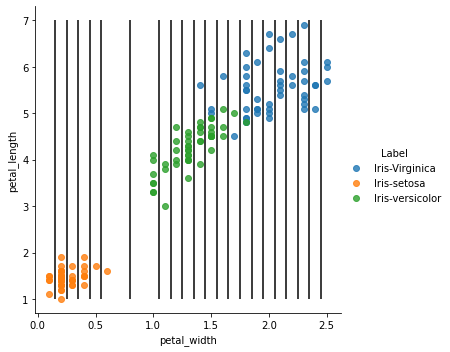

In [55]:
sns.lmplot(data= df, x = "petal_width",y="petal_length",hue = "Label",fit_reg = False)
plt.vlines(x=Potentialsplit_data[3],ymin = 1,ymax = 7)
plt.show()

7. `Determine Best Split`: - Based on Potential Split, we split our data and then we calculate overall Gini Index. The overall Gini index will the lowest value will be our best feature and split value.

In [56]:
def determine_best_split(data,potential_splits):
        """Based on potential_split we calcuate lowest overall Gini Index"""
        overall_GiniIndex = 9999
        for column_index in potential_splits:
            for value in potential_splits[column_index]:
                data_below, data_above = split_data(data, split_column=column_index, split_value=value)
                current_overall_GiniIndex = OverallGiniIndex(data_below, data_above)

                if current_overall_GiniIndex <= overall_GiniIndex:
                    overall_GiniIndex = current_overall_GiniIndex
                    best_split_column = column_index
                    best_split_value = value

        return best_split_column, best_split_value

In [57]:
BestFeature,Best_Split_value = determine_best_split(data,Potentialsplit_data)

In [58]:
df.columns[BestFeature],Best_Split_value

('petal_width', 0.8)

In [59]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,Label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


8. `Decision Tree algorithm`: - We will merge all necessary functions and apply recursive function to build decision tree.

In [123]:
def decision_tree_algorithm(df,counter = 0,min_sample =2,max_depth =5):
    
    if counter ==0:
        data = df.values
        global Column_header
        Column_header = df.columns
    else:
        data = df
    
    
    if check_purity(data) or (len(data) <= min_sample) or (counter == max_depth): # if only one dependent variable that means I have nothing to split then I will simply return the variable.
        classify = classify_data(data)
        return classify
    else:
        counter +=1
        Potentialsplit_data = potential_split(data) # If we have more than one dependent variable
        BestFeature, Split_Value = determine_best_split(data,Potentialsplit_data) # Find best feature and split value
        data_below,data_above = split_data(data,split_column = BestFeature,split_value = Split_Value) # Split the data
        
        feature = Column_header[BestFeature] # Get column name
        Tree = "{} <= {}".format(feature,Split_Value) # Store result in a dictionary
        sub_tree = {Tree:[]}
        
        # Recursive function
        True_answer = decision_tree_algorithm(data_below,counter,min_sample,max_depth)
        False_answer = decision_tree_algorithm(data_above,counter,min_sample,max_depth)
        
        # Visulize the result we append the split
        sub_tree[Tree].append(True_answer)
        sub_tree[Tree].append(False_answer)

        
        return sub_tree
     

In [130]:
sub_tree = decision_tree_algorithm(df,max_depth =4)

In [131]:
sub_tree

{'petal_width <= 0.8': ['Iris-setosa',
  {'petal_width <= 1.75': [{'petal_length <= 4.95': [{'petal_width <= 1.65': ['Iris-versicolor',
        'Iris-Virginica']},
      {'petal_width <= 1.55': ['Iris-Virginica', 'Iris-versicolor']}]},
    {'petal_length <= 4.85': [{'sepal_width <= 3.1': ['Iris-Virginica',
        'Iris-versicolor']},
      'Iris-Virginica']}]}]}

In [95]:
df.columns[3]

'petal_width'

In [69]:
#def factorial(x):
 #   if x==1:
  #      return 1
   # else:
    #    return x*factorial(x-1)

In [71]:
#factorial(2)

2

In [98]:
from pprint import pprint
pprint(sub_tree)

{'petal_width <= 0.8': ['Iris-setosa',
                        {'petal_width <= 1.75': [{'petal_length <= 4.95': [{'petal_width <= 1.65': ['Iris-versicolor',
                                                                                                    'Iris-Virginica']},
                                                                           {'petal_width <= 1.55': ['Iris-Virginica',
                                                                                                    {'petal_length <= 5.449999999999999': ['Iris-versicolor',
                                                                                                                                           'Iris-Virginica']}]}]},
                                                 {'petal_length <= 4.85': [{'sepal_width <= 3.1': ['Iris-Virginica',
                                                                                                   'Iris-versicolor']},
                                              

#### Visualize Decision Tree using Graphviz library

In [112]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(df.iloc[:,:-1],df.iloc[:,-1:])

In [113]:
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [114]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=iris.feature_names,class_names=iris.target_names,filled=True, rounded=True,special_characters=True)  
graph = graphviz.Source(dot_data)

In [115]:
import os
os.environ["PATH"] += os.pathsep + 'C:/ProgramData/Anaconda3/Library/bin/graphviz/'

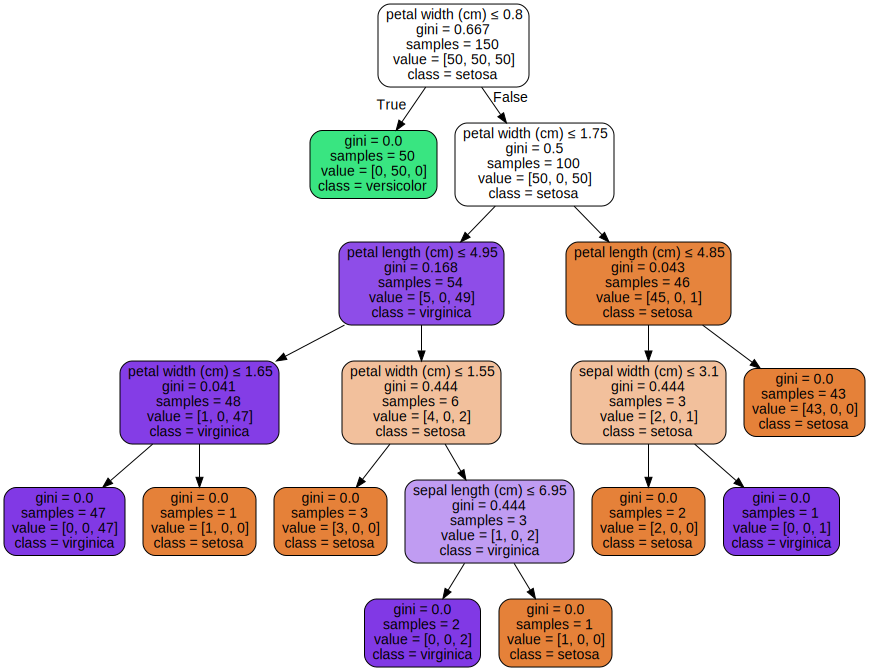

In [116]:
graph